In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential, layers, models
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow.keras.callbacks import EarlyStopping
import h5py as h5
import matplotlib.pyplot as plt

2023-06-12 12:07:13.125563: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 12:07:13.265466: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-12 12:07:14.073672: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-12 12:07:14.073744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [3]:
y_df = pd.read_csv("../data/y_dataframe.csv")

/tmp/ipykernel_3957/4167803891.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  y_df = pd.read_csv("../data/y_dataframe.csv")


In [4]:
y_train = y_df.iloc[:8859, 1:].to_numpy()

In [5]:
y_df

,Unnamed: 0,1950s,1970,1971,2009,4-way,abandon,about,above,abraham,...,yogurt,york,you,young,younger,youth,zebra,zip,zombie,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,X_test_id_977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9837,X_test_id_978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9838,X_test_id_979,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9839,X_test_id_980,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_df.drop(columns = ["Unnamed: 0"], inplace = True)

In [8]:
X_train = np.load("../data/nsd_train_fmriavg_nsdgeneral_sub1.npy")

In [7]:
# from sklearn.preprocessing import RobustScaler

In [9]:
scaler = RobustScaler()

In [10]:
X_scaled = scaler.fit_transform(X_train)

In [10]:
# from tensorflow.keras import Sequential
# from tensorflow.keras import layers

In [11]:
model = Sequential([layers.Dense(100, input_shape = (15724,), activation = "relu"),
                  layers.Dense(100, activation = "relu"),
                    layers.Dropout(0.5),
                  layers.Dense(200, activation = "relu"),
                    layers.Dropout(0.5),
                  layers.Dense(500, activation = "relu"),
                    layers.Dropout(0.5),
                    layers.Dense(500, activation = "relu"),
                    layers.Dropout(0.5),
                    layers.Dense(1000, activation = "relu"),
                    layers.Dropout(0.5),
                    layers.Dense(2000, activation = "relu"),
                  layers.Dense(2637, activation = "sigmoid")])

2023-06-12 12:08:17.945457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-12 12:08:18.137543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-06-12 12:08:18.137560: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-06-12 12:08:18.139449: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (o

In [12]:
model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [13]:
history = model.fit(X_scaled, y_train, validation_split=0.1, batch_size = 32, epochs = 30)

2023-06-12 12:08:39.960588: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 501469808 exceeds 10% of free system memory.


Epoch 1/30


2023-06-12 12:08:40.377684: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 168198408 exceeds 10% of free system memory.


250/250 [==============================] - 6s 22ms/step - loss: 0.0194 - val_loss: 0.0810
Epoch 2/30
250/250 [==============================] - 5s 21ms/step - loss: 0.0100 - val_loss: 0.0323
Epoch 3/30
250/250 [==============================] - 5s 21ms/step - loss: 0.0092 - val_loss: 0.0087
Epoch 4/30
250/250 [==============================] - 5s 21ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 5/30
250/250 [==============================] - 5s 21ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 6/30
250/250 [==============================] - 5s 21ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 7/30
250/250 [==============================] - 5s 21ms/step - loss: 0.0084 - val_loss: 0.0085
Epoch 8/30
250/250 [==============================] - 5s 21ms/step - loss: 0.0083 - val_loss: 0.0084
Epoch 9/30
250/250 [==============================] - 5s 20ms/step - loss: 0.0082 - val_loss: 0.0084
Epoch 10/30
250/250 [==============================] - 5s 20ms/step - loss: 0.0081 - val_loss: 0.0082


In [14]:
X_test = np.load("../data/nsd_test_fmriavg_nsdgeneral_sub1.npy")

In [15]:
X_test_scaled = scaler.transform(X_test)

In [106]:
idx=700
test_answer = model.predict(X_test_scaled[idx].reshape(1,-1))

1/1 [==============================] - 0s 17ms/step


In [107]:
labels = y_df.columns

In [108]:
labels

Index(['1950s', '1970', '1971', '2009', '4-way', 'abandon', 'about', 'above',
       'abraham', 'abstract',
       ...
       'yogurt', 'york', 'you', 'young', 'younger', 'youth', 'zebra', 'zip',
       'zombie', 'zoo'],
      dtype='object', length=2637)

In [109]:
test_answer

array([[1.8265948e-05, 1.1384608e-05, 2.3423667e-05, ..., 2.1688829e-04,
        2.6842470e-05, 4.1517545e-04]], dtype=float32)

In [110]:
test_answer[test_answer>0.4]

array([], dtype=float32)

In [112]:
test_answer_idxs = np.argpartition(test_answer[0],-2)[-2:]

In [113]:
labels[test_answer_idxs]

Index(['park', 'clock'], dtype='object')

In [31]:
images_file = h5.File("../data/nsd_stimuli.hdf5", "r")
images = images_file['imgBrick']
stim_list_test=np.load('../data/nsd_test_stim_list1.npy')
stim_list_train=np.load('../data/subj01_nsd_train_stim_list1.npy')
train_caps=np.load('../data/nsd_train_cap_sub1.npy')
test_caps=np.load('../data/nsd_test_cap_sub1.npy')
X_test_dataframe = pd.read_csv('../data/df_test.csv')

In [51]:
# idx=300
# test_answer = model.predict(X_test_scaled[idx].reshape(1,-1))
# labels = y_df.columns

# test_answer_idxs = np.argpartition(test_answer[0],-2)[-2:]
# labels[test_answer_idxs]

In [100]:
df_test_idx_caps=X_test_dataframe[['Image_index', 'test_caps_processed']]



In [124]:
idx=333
test_index=stim_list_test[idx]
test_index

40153

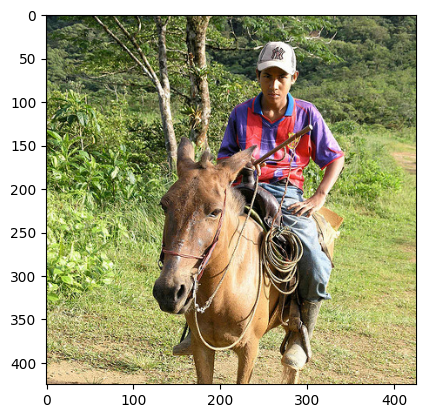

Original captions ['' 'a man with a hat sitting on a horse' '' '' '']
Test captions processed: ['man', 'hat', 'horse', 'sit']
fMRI array [ 666.         -214.           98.66666412 ...  723.33331299  632.33331299
  597.        ]
predicted labels Index(['park', 'clock'], dtype='object')


In [129]:
idx=90
test_index=stim_list_test[idx]
caps=df_test_idx_caps.loc[df_test_idx_caps['Image_index'] == test_index, 'test_caps_processed'].item()
plt.imshow(images[test_index])
plt.show()


print('Original captions', test_caps[idx])
print('Test captions processed:' , caps)
print('fMRI array', X_test[idx])
print('predicted labels', labels[test_answer_idxs])


In [34]:
X_test_dataframe

,Image_index,test_caps_processed,fMRI
0,46002,"['cow', 'white', 'grass', 'eat']",[-339.66665649 -236.66667175 13.66666698 ......
1,48617,"['airplane', 'port', 'cloud', 'plane']",[ 277.5 -418. 14.5 ... 122. 436.5 461. ]
2,44980,"['airplane', 'sky', 'build', 'sunset']",[ 69. 177. -49.66666794 ... 28...
3,32625,"['kitchen', 'view', 'middle', 'day']",[ 366.66665649 -412. 42.33333206 ......
4,53052,"['clock', 'center', 'tile', 'star']",[ -49.33333206 -321.66665649 31.33333397 ......
...,...,...,...
977,19672,"['snowy', 'slope', 'ski', 'people']",[878.66668701 259.66665649 51. ... 15...
978,18535,"['giraffe', 'small', 'green', ' ']",[ 531. 104. -336.5 ... -442. 161. 516. ]
979,21318,"['dog', 'lie', 'inside', 'purple']",[255.66667175 -48.66666794 -91.66666412 ... 12...
980,32857,"['ski', 'snowboard', 'man', ' ']",[1133. 331. 385. ... 1360. 1168. 1095.]
